# Jeu de données Titanic

In [62]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
titanic = pd.read_csv("../Data/titanic.csv", sep=";")
print(titanic.shape)

(1046, 4)


In [3]:
titanic.head()

,pclass,survived,gender,age
0,1,yes,F,29.0000
1,1,yes,M,0.9167
2,1,no,F,2.0000
3,1,no,M,30.0000
4,1,no,F,25.0000


In [4]:
titanic.dtypes

pclass        int64
survived     object
gender       object
age         float64
dtype: object

On remarque que la variable pclass est une variable quantitative. Or pclass permet de catégoriser les personnes par ordre, c'est donc une variable qualitative ordinale. Et sa transformation se fait avec la fonction astype()

In [5]:
titanic['pclass'] = titanic.pclass.astype('object')
titanic.age = titanic.age.astype('int')
titanic.dtypes

pclass      object
survived    object
gender      object
age          int64
dtype: object

In [6]:
titanic.iloc[255:260,:]

,pclass,survived,gender,age
255,1,no,M,52
256,1,yes,F,39
257,1,yes,M,48
258,1,no,M,49
259,1,yes,M,17


In [95]:
# Descirption des données
print(titanic.describe(include = "all"))

        pclass survived gender          age
count   1046.0     1046   1046  1046.000000
unique     3.0        2      2          NaN
top        3.0       no      M          NaN
freq     501.0      619    658          NaN
mean       NaN      NaN    NaN    29.857553
std        NaN      NaN    NaN    14.426974
min        NaN      NaN    NaN     0.000000
25%        NaN      NaN    NaN    21.000000
50%        NaN      NaN    NaN    28.000000
75%        NaN      NaN    NaN    39.000000
max        NaN      NaN    NaN    80.000000


In [22]:
rp.summary_cont(titanic.age)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,1046.0,29.857553,14.426974,0.446077,28.982245,30.73286


In [ ]:
# Affiche que les individus ayant survécu
titanic.loc[titanic.survived=='yes',:].head()

In [76]:
print(titanic.survived=="yes").sum()

427


In [79]:
# Compte chaque label
(titanic.pclass).value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

In [96]:
pd.crosstab(titanic.pclass, titanic.gender)

gender,F,M
pclass,,
1,133,151
2,103,158
3,152,349


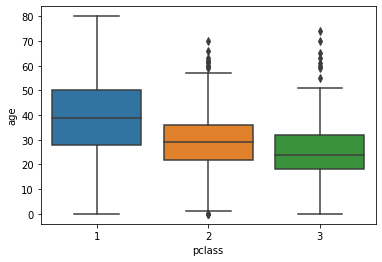

In [14]:
#titanic.boxplot('age', by='pclass')
sns.boxplot("pclass", "age", data = titanic)

In [38]:
model = ols('age ~ pclass', data = titanic).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     108.5
Date:                Fri, 11 Oct 2019   Prob (F-statistic):           1.50e-43
Time:                        10:44:54   Log-Likelihood:                -4176.7
No. Observations:                1046   AIC:                             8359.
Df Residuals:                    1043   BIC:                             8374.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      39.1514      0.780     50.220      0.000      37.622      40.681
pclass[T.2]    -9.6648      1.127     -8.579      0.000     -11.875      -7.454
pclass[T.3]   -14.3690      0.976    -14.724      0.000     -16.284     -12.454
==============================================================================
Omnibus:                       14.087   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.975
Skew:                           0.240   Prob(JB):                     0.000560
Kurtosis:                       3.337   Cond. No.                         4.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model_anova = sm.stats.anova_lm(model, type = 2)
print(model_anova)

              df         sum_sq       mean_sq           F        PR(>F)
pclass       2.0   37470.797404  18735.398702  108.541341  1.503717e-43
Residual  1043.0  180032.977931    172.610717         NaN           NaN


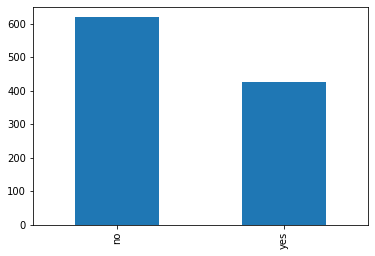

In [77]:
titanic.survived.value_counts().plot.bar()